In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix

In [19]:
# 1. Load Dataset (Windows Path)
# =========================
DATA_PATH = r"C:\Users\thiny\OneDrive\Desktop\gittest\AI_2026\Day06 Liner and logistic Regression, Perceptron, train and test\groupB\tyh_Real_Estate\Real estate.csv"

df = pd.read_csv(DATA_PATH)

# Rename columns
df.columns = [
    "No",
    "transaction_date",
    "house_age",
    "distance_to_mrt",
    "num_convenience_stores",
    "latitude",
    "longitude",
    "price_per_unit_area"
]


In [20]:
# 2. Features & Target (Linear)
# =========================
X = df[[
    "house_age",
    "distance_to_mrt",
    "num_convenience_stores",
    "latitude",
    "longitude"
]]

y_reg = df["price_per_unit_area"]


In [21]:
# 3. Train / Test Split
# =========================
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

=== Linear Regression ===
R2 Score: 0.6746
RMSE    : 7.3879


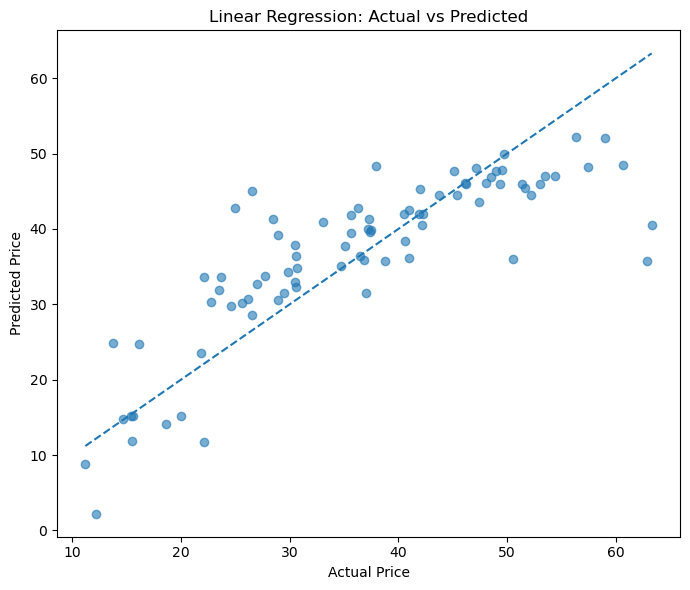

In [22]:
# 4. Linear Regression
# =========================
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_reg)
y_pred_lr = lr_model.predict(X_test)

r2 = r2_score(y_test_reg, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))

print("=== Linear Regression ===")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE    : {rmse:.4f}")

# Plot: Actual vs Predicted (Like your image)
plt.figure(figsize=(7, 6))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()


In [23]:
# 5. Logistic Regression (Binary Classification)
# High price = 1, Low price = 0
# =========================
df["high_price"] = (df["price_per_unit_area"] >= df["price_per_unit_area"].median()).astype(int)

X_cls = X
y_cls = df["high_price"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)
y_pred_log = log_model.predict(X_test_c)

log_acc = accuracy_score(y_test_c, y_pred_log)

print("\n=== Logistic Regression ===")
print(f"Accuracy: {log_acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_log))


=== Logistic Regression ===
Accuracy: 0.8193
Confusion Matrix:
 [[37 11]
 [ 4 31]]


In [24]:
# 6. Perceptron
# =========================
per_model = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
per_model.fit(X_train_c, y_train_c)
y_pred_per = per_model.predict(X_test_c)

per_acc = accuracy_score(y_test_c, y_pred_per)

print("\n=== Perceptron ===")
print(f"Accuracy: {per_acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_per))


=== Perceptron ===
Accuracy: 0.7952
Confusion Matrix:
 [[39  9]
 [ 8 27]]


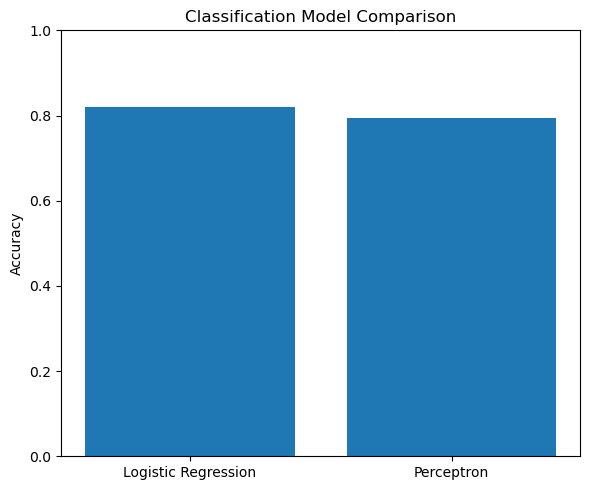

In [25]:
# 7. Compare Accuracies (Bar Chart)
# =========================
models = ["Logistic Regression", "Perceptron"]
accs = [log_acc, per_acc]

plt.figure(figsize=(6, 5))
plt.bar(models, accs)
plt.ylabel("Accuracy")
plt.title("Classification Model Comparison")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()